In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

start: 85374 records in this dataset 

In [13]:
data = pd.read_csv('datasets/cdc_death_counts_by_sex_age_state.csv')
# counts_sex_age_state = counts_sex_age_state[counts_sex_age_state['State' == 'United States']]
data['State'].value_counts()
len(data)
ny = data[(data['State'] == 'New York') | (data['State'] == 'New York City')]
ny.groupby('State')['COVID-19 Deaths'].agg('mean')
len(ny[ny['State']=='New York'])  #1581 
len(ny[ny['State']=='New York City'])  
under17 =['Under 1 year', '0-17 years', '1-4 years', '15-24 years', '5-14 years']
# final dataset 
data = data[~data['Age Group'].isin(under17)]
# data['Start Date'].values
data

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,All Ages,974282.0,7520550.0,855731.0,504882.0,10684.0,1334231.0,NaN
6,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,18-29 years,6044.0,140833.0,5161.0,2890.0,170.0,8470.0,NaN
7,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,25-34 years,10803.0,168507.0,8792.0,5401.0,256.0,14427.0,NaN
8,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,30-39 years,17609.0,208720.0,13974.0,9074.0,352.0,22829.0,NaN
9,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,35-44 years,26952.0,249728.0,21174.0,14244.0,411.0,34244.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85369,03/23/2022,03/01/2022,03/19/2022,By Month,2022.0,3.0,Puerto Rico,Female,50-64 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
85370,03/23/2022,03/01/2022,03/19/2022,By Month,2022.0,3.0,Puerto Rico,Female,55-64 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
85371,03/23/2022,03/01/2022,03/19/2022,By Month,2022.0,3.0,Puerto Rico,Female,65-74 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
85372,03/23/2022,03/01/2022,03/19/2022,By Month,2022.0,3.0,Puerto Rico,Female,75-84 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [83]:
data['Group'].value_counts() # measures whether data was collected by 
                                    # month, year, or total 
    

by_total = data[data['Group']=='By Total'] # 51 records per state 
by_total # 2754 records 

by_year = data[data['Group']=='By Year'] # 2020, 2021, 2022 
by_year # 8262 records 

by_month = data[data['Group'] == 'By Month']
by_month # 74358 records 

totals = by_total[by_total['Sex']=='All Sexes']


In [85]:
data['COVID-19 Deaths'] #85374, dtype: float64 
# data['COVID-19 Deaths'].dropna()  #63928
data['COVID-19 Deaths'].value_counts() # 0.0        29148
# data[data['COVID-19 Deaths'] 
zero_covid = data[data['COVID-19 Deaths'] == 0]
# zero_covid['State'].value_counts()
zero_covid['Start Date'].value_counts()
zero_covid

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
1570,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,New Hampshire,Female,18-29 years,0.0,131.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1-9...
2420,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,Vermont,Male,18-29 years,0.0,144.0,0.0,0.0,0.0,0.0,NaN
2421,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,Vermont,Male,25-34 years,0.0,187.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1-9...
3083,03/23/2022,01/01/2020,12/31/2020,By Year,2020.0,NaN,Alaska,Male,18-29 years,0.0,137.0,NaN,0.0,NaN,NaN,One or more data cells have counts between 1-9...
3084,03/23/2022,01/01/2020,12/31/2020,By Year,2020.0,NaN,Alaska,Male,25-34 years,0.0,140.0,NaN,0.0,NaN,NaN,One or more data cells have counts between 1-9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85369,03/23/2022,03/01/2022,03/19/2022,By Month,2022.0,3.0,Puerto Rico,Female,50-64 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
85370,03/23/2022,03/01/2022,03/19/2022,By Month,2022.0,3.0,Puerto Rico,Female,55-64 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
85371,03/23/2022,03/01/2022,03/19/2022,By Month,2022.0,3.0,Puerto Rico,Female,65-74 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN
85372,03/23/2022,03/01/2022,03/19/2022,By Month,2022.0,3.0,Puerto Rico,Female,75-84 years,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [86]:
totals.columns
# summed_deaths = data['Pneumonia, Influenza, or COVID-19 Deaths']
# deathcount_df = pd.DataFrame({'Pneumonia, Influenza, or COVID-19 Deaths':totals['Pneumonia, Influenza, or COVID-19 Deaths']\
#                               , 'Total Deaths':totals['Total Deaths']})
# deathcount_df 
# deathcount_df['difference'] = deathcount_df['Total Deaths']\
#         - deathcount_df['Pneumonia, Influenza, or COVID-19 Deaths']
# deathcount_df

states = totals[totals['State']!='United States']

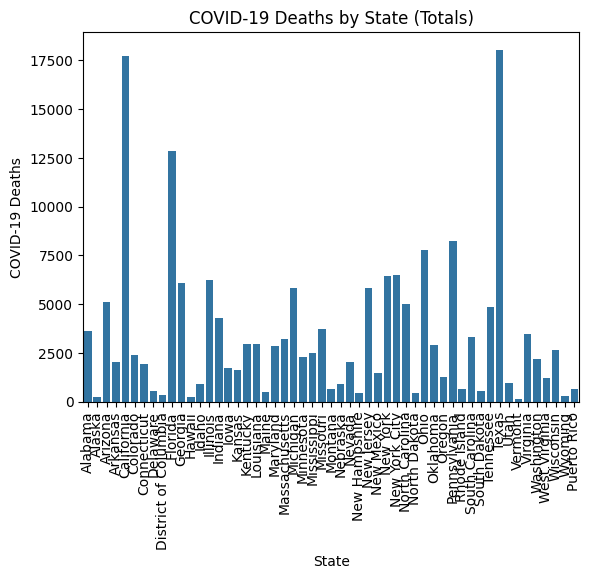

<Figure size 1000x1000 with 0 Axes>

In [90]:
sns.barplot(data=states, x="State",y='COVID-19 Deaths', errorbar=None);
plt.title('COVID-19 Deaths by State (Totals)');
plt.xticks(rotation=90);
plt.figure(figsize=(10, 10));
plt.tight_layout();
plt.show();

'Data As Of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'State', 'Sex', 'Age Group', 'COVID-19 Deaths', 'Total Deaths',
       'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Footnote']

In [91]:
state_data = states.groupby('State')['COVID-19 Deaths'].agg('mean')
state_avg = pd.DataFrame(state_data)
state_avg


,COVID-19 Deaths
State,
Alabama,3611.750000
Alaska,234.666667
Arizona,5110.083333
Arkansas,2060.333333
California,17722.416667
Colorado,2413.250000
Connecticut,1931.083333
Delaware,569.272727
District of Columbia,370.083333


In [92]:
# states_ordered = totals.sort_values(by ='COVID-19 Deaths',ascending = False) 
states_ordered = totals.groupby('State')['COVID-19 Deaths'].agg('mean')
states_ordered.sort_values(ascending = False).head(6)

State
United States    182804.916667
Texas             18038.833333
California        17722.416667
Florida           12836.916667
Pennsylvania       8253.416667
Ohio               7795.000000
Name: COVID-19 Deaths, dtype: float64

In [9]:
# sns.histplot(data=states, x = 'COVID-19 Deaths',hue='State');
# plt.title('Distribution of Average COVID-19 Deaths (Totals) Across All States')
# plt.xlabel('Average COVID-19 Deaths')

In [93]:
# yr_allsex = by_year[by_year['State']=='United States']
yr_allsex = by_year[by_year['Sex']=='All Sexes']
yr_state = pd.pivot_table(yr_allsex, values= 'COVID-19 Deaths', index='State', columns = 'Year', aggfunc='mean')

yr_mean = yr_state.mean() 
yr_state = pd.concat([yr_state, yr_mean.to_frame().T])
yr_state
yr_state['Mean'] = np.mean(yr_state, axis=1)
yr_state

Year,2020.0,2021.0,2022.0,Mean
Alabama,1238.500000,1905.833333,467.416667,1203.916667
Alaska,61.333333,166.083333,34.714286,87.376984
Arizona,1748.583333,2712.416667,649.083333,1703.361111
Arkansas,730.666667,1034.500000,295.166667,686.777778
California,6306.666667,9347.916667,2067.833333,5907.472222
Colorado,909.750000,1188.250000,343.090909,813.696970
Connecticut,1212.909091,583.083333,256.454545,684.148990
Delaware,261.222222,281.000000,107.200000,216.474074
District of Columbia,211.545455,152.000000,59.428571,140.991342
Florida,3961.250000,7491.750000,1383.916667,4278.972222


In [94]:
top5 = yr_state.loc[['California', 'Florida', 'Texas'\
                     , 'Pennsylvania', 'Ohio']\
                    , [2020, 2021, 2022,'Mean']]
top5

Year,2020.0,2021.0,2022.0,Mean
California,6306.666667,9347.916667,2067.833333,5907.472222
Florida,3961.250000,7491.750000,1383.916667,4278.972222
Texas,6352.666667,9681.833333,2004.333333,6012.944444
Pennsylvania,3250.416667,3811.416667,1191.583333,2751.138889
Ohio,2670.833333,3847.416667,1276.750000,2598.333333


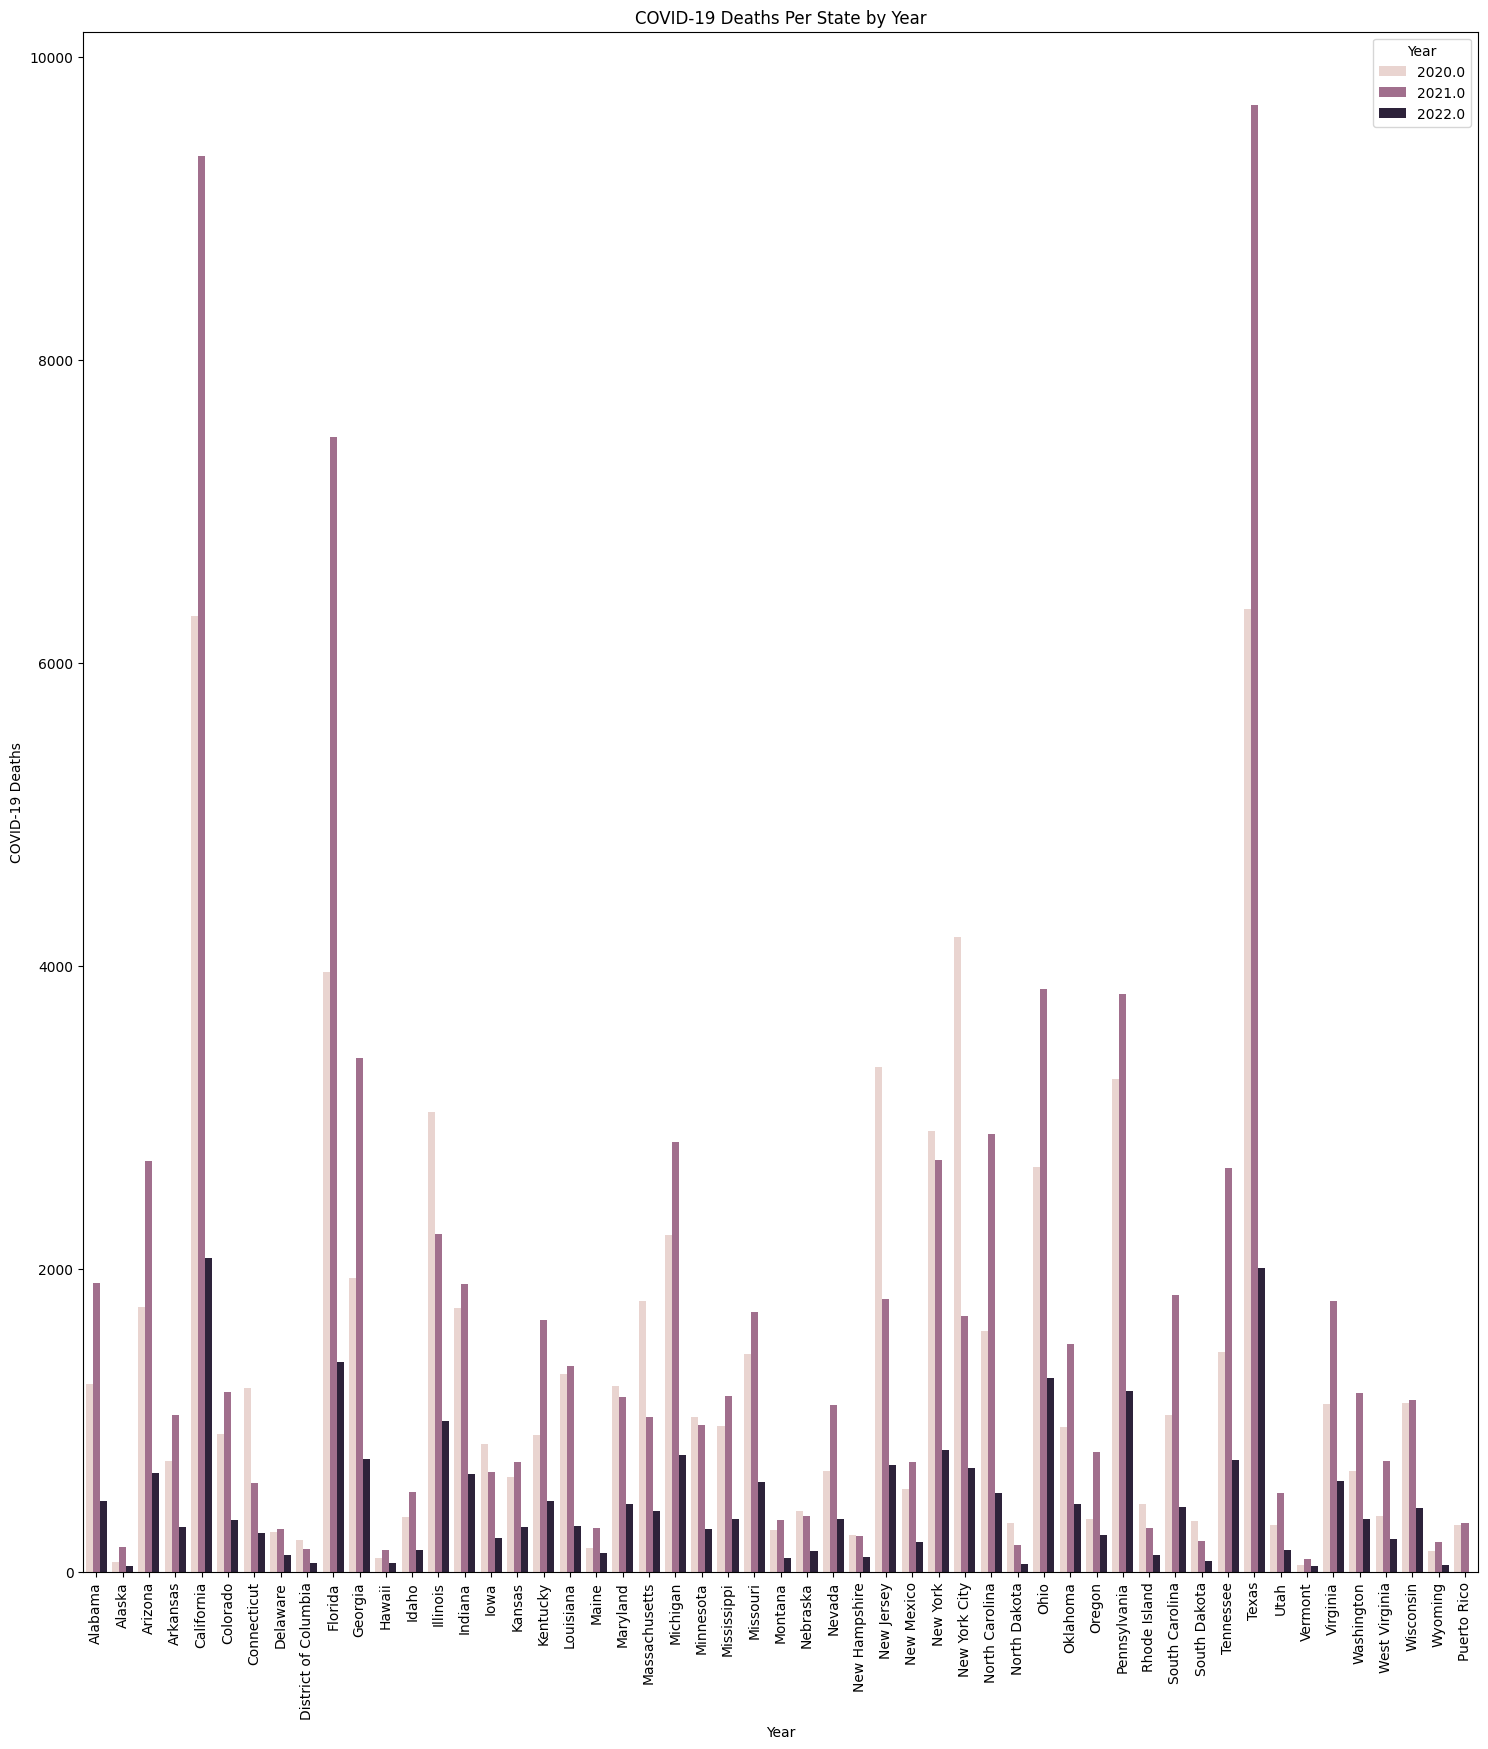

In [95]:
# sns.histplot(data=yr_allsex, x='COVID-19 Deaths', hue='Year', kde=True);
yr_states = yr_allsex[yr_allsex['State']!='United States']
yr_states
plt.figure(figsize=(18,20))
sns.barplot(data=yr_states,x = 'State', y = 'COVID-19 Deaths', hue='Year',errorbar=None);
plt.xlabel('Year');
plt.xticks(rotation=90);
plt.title('COVID-19 Deaths Per State by Year');


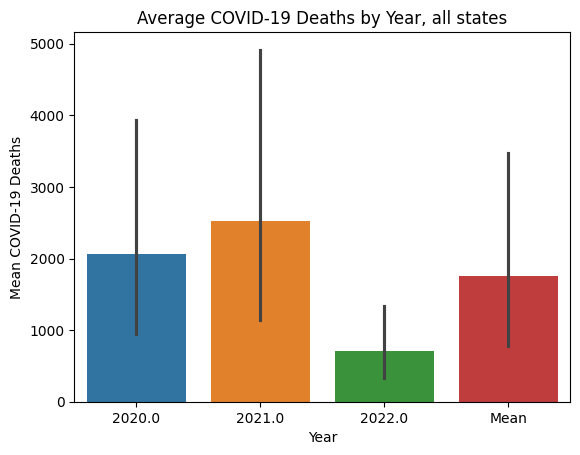

In [25]:
# sns.barplot(yr_state.loc[[:, ); 
sns.barplot(yr_s
plt.title('Average COVID-19 Deaths by Year, all states'); 
plt.ylabel('Mean COVID-19 Deaths');

In [46]:
yr_state



Year,2020.0,2021.0,2022.0,Mean
Alabama,1061.571429,1761.461538,400.642857,1074.558608
Alaska,42.461538,142.357143,27.000000,70.606227
Arizona,1500.928571,2331.142857,487.687500,1439.919643
Arkansas,626.285714,888.071429,253.000000,589.119048
California,5413.714286,7492.666667,1776.071429,4894.150794
Colorado,780.642857,1020.714286,251.600000,684.319048
Connecticut,1026.307692,538.230769,188.066667,584.201709
Delaware,213.727273,281.000000,76.571429,190.432900
District of Columbia,179.000000,139.333333,46.222222,121.518519
Florida,3171.400000,5302.647059,1187.642857,3220.563305


In [96]:
# top_states_yrs = yr_allsex.groupby('Year')['COVID-19 Deaths'].agg('max')
# max_deaths = yr_allsex.groupby('Year')['COVID-19 Deaths'].transform('max')

# mask = yr_allsex['COVID-19 Deaths'] == max_deaths

# topyrstate = yr_allsex[mask]

# top_states_yr = yr_allsex_states.sort_values(['Year', 'COVID-19 Deaths'], ascending=False)
# top_states_yr 
yr_allsex_states = yr_allsex[yr_allsex['State'] != 'United States']
state_2021 = yr_allsex_states[yr_allsex_states['Year']==2022.0]\
                        .sort_values(by='COVID-19 Deaths', ascending=False)
state_2021.head(5)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
3621,03/23/2022,01/01/2022,03/19/2022,By Year,2022.0,NaN,California,All Sexes,All Ages,11029.0,63879.0,9513.0,6572.0,20.0,13987.0,NaN
9741,03/23/2022,01/01/2022,03/19/2022,By Year,2022.0,NaN,Texas,All Sexes,All Ages,10641.0,51343.0,8010.0,5877.0,62.0,12814.0,NaN
4386,03/23/2022,01/01/2022,03/19/2022,By Year,2022.0,NaN,Florida,All Sexes,All Ages,7644.0,47485.0,6573.0,4412.0,35.0,9831.0,NaN
8517,03/23/2022,01/01/2022,03/19/2022,By Year,2022.0,NaN,Ohio,All Sexes,All Ages,6872.0,29749.0,4775.0,3733.0,33.0,7941.0,NaN
8976,03/23/2022,01/01/2022,03/19/2022,By Year,2022.0,NaN,Pennsylvania,All Sexes,All Ages,6393.0,33109.0,4278.0,3108.0,53.0,7603.0,NaN


In [99]:
state_2020 = yr_allsex_states[yr_allsex_states['Year']==2020.0]\
                        .sort_values(by='COVID-19 Deaths', ascending=False)
state_2020.head(5)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
3519,03/23/2022,01/01/2020,12/31/2020,By Year,2020.0,NaN,California,All Sexes,All Ages,33547.0,320573.0,37002.0,18780.0,819.0,52577.0,NaN
9639,03/23/2022,01/01/2020,12/31/2020,By Year,2020.0,NaN,Texas,All Sexes,All Ages,33542.0,253688.0,31667.0,18030.0,578.0,47720.0,NaN
7956,03/23/2022,01/01/2020,12/31/2020,By Year,2020.0,NaN,New York City,All Sexes,All Ages,22282.0,82143.0,12963.0,8423.0,1021.0,27008.0,NaN
4284,03/23/2022,01/01/2020,12/31/2020,By Year,2020.0,NaN,Florida,All Sexes,All Ages,21827.0,243065.0,25437.0,12486.0,486.0,35229.0,NaN
8874,03/23/2022,01/01/2020,12/31/2020,By Year,2020.0,NaN,Pennsylvania,All Sexes,All Ages,18407.0,156603.0,13644.0,6985.0,333.0,25388.0,NaN


In [100]:
state_2022 = yr_allsex_states[yr_allsex_states['Year']==2022.0]\
                        .sort_values(by='COVID-19 Deaths', ascending=False)
state_2022.head(5)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
3621,03/23/2022,01/01/2022,03/19/2022,By Year,2022.0,NaN,California,All Sexes,All Ages,11029.0,63879.0,9513.0,6572.0,20.0,13987.0,NaN
9741,03/23/2022,01/01/2022,03/19/2022,By Year,2022.0,NaN,Texas,All Sexes,All Ages,10641.0,51343.0,8010.0,5877.0,62.0,12814.0,NaN
4386,03/23/2022,01/01/2022,03/19/2022,By Year,2022.0,NaN,Florida,All Sexes,All Ages,7644.0,47485.0,6573.0,4412.0,35.0,9831.0,NaN
8517,03/23/2022,01/01/2022,03/19/2022,By Year,2022.0,NaN,Ohio,All Sexes,All Ages,6872.0,29749.0,4775.0,3733.0,33.0,7941.0,NaN
8976,03/23/2022,01/01/2022,03/19/2022,By Year,2022.0,NaN,Pennsylvania,All Sexes,All Ages,6393.0,33109.0,4278.0,3108.0,53.0,7603.0,NaN
